In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
#Setting the Working Directory
os.chdir("C:/Users/rjnaw/Downloads")

In [3]:
#Loading the data
learning_2 = pd.read_excel("P_L.xlsx")

In [4]:
#Making a copy of the data
Personalized = learning_2.copy()
Personalized

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description
0,10,Female,Lisa Brown,Music,Python,4.8,64,5,Kinesthetic,Slow,6,1,Low,9.8,Advanced,5.2,High,Academic Excellence,Python: hands-on approach with focus on critic...
1,11,Male,John Wilson,Dance,Physics,4.6,84,5,Auditory,Slow,1,8,High,8.9,Intermediate,6.4,Medium,Skill Enhancement,Physics: collaborative approach with focus on ...
2,16,Male,Jennifer Lee,Study,History,4.0,88,6,Visual,Fast,7,5,Medium,9.9,Intermediate,6.4,Low,Career Development,History: collaborative approach with focus on ...
3,17,Female,Neha Gupta,Study,Chemistry,3.6,66,5,Auditory,Slow,1,5,Low,1.3,Beginner,6.0,High,Personal Growth,Chemistry: theoretical approach with focus on ...
4,18,Female,Emily White,Music,Physics,3.3,82,5,Auditory,Fast,1,5,High,4.4,Beginner,7.5,High,Academic Excellence,Physics: theoretical approach with focus on cr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,6985,Female,David Miller,Gaming,History,4.2,69,6,Auditory,Slow,4,4,Low,2.6,Intermediate,8.5,High,Skill Enhancement,History: collaborative approach with focus on ...
2289,6988,Female,Neha Gupta,Sports,Chemistry,3.6,86,5,Kinesthetic,Fast,10,8,Low,4.4,Advanced,2.0,Low,Academic Excellence,Chemistry: hands-on approach with focus on pro...
2290,6989,Female,Neha Gupta,Study,Python,4.9,94,6,Auditory,Fast,2,4,High,1.1,Intermediate,1.2,Medium,Personal Growth,Python: theoretical approach with focus on cri...
2291,6990,Male,Vikram Malhotra,Art,Physics,3.1,99,6,Auditory,Fast,10,8,High,2.7,Beginner,7.4,High,Career Development,Physics: interactive approach with focus on cr...


In [5]:
#Checking for missing values
Personalized.isnull().sum()

Student Id              0
Gender                  0
Name                    0
Hobby                   0
Course                  0
Course_Rating           1
Test_Score              0
Study_Hours             0
Learning_Style          0
Learning_Pace           0
Motivation_Score        0
Parental_Involvement    0
Consistency             0
Self_Efficacy           0
Prior_Knowledge         0
Skill_Assessment        0
Autonomy_Level          0
Learning_Goals          0
Course_Description      0
dtype: int64

In [6]:
#Removing Unnamed columns
Personalized = Personalized.drop(columns =[col for col in Personalized.columns if 'Unnamed' in col])
Personalized.head()

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description
0,10,Female,Lisa Brown,Music,Python,4.8,64,5,Kinesthetic,Slow,6,1,Low,9.8,Advanced,5.2,High,Academic Excellence,Python: hands-on approach with focus on critic...
1,11,Male,John Wilson,Dance,Physics,4.6,84,5,Auditory,Slow,1,8,High,8.9,Intermediate,6.4,Medium,Skill Enhancement,Physics: collaborative approach with focus on ...
2,16,Male,Jennifer Lee,Study,History,4.0,88,6,Visual,Fast,7,5,Medium,9.9,Intermediate,6.4,Low,Career Development,History: collaborative approach with focus on ...
3,17,Female,Neha Gupta,Study,Chemistry,3.6,66,5,Auditory,Slow,1,5,Low,1.3,Beginner,6.0,High,Personal Growth,Chemistry: theoretical approach with focus on ...
4,18,Female,Emily White,Music,Physics,3.3,82,5,Auditory,Fast,1,5,High,4.4,Beginner,7.5,High,Academic Excellence,Physics: theoretical approach with focus on cr...


In [7]:
Personalized.isnull().sum()

Student Id              0
Gender                  0
Name                    0
Hobby                   0
Course                  0
Course_Rating           1
Test_Score              0
Study_Hours             0
Learning_Style          0
Learning_Pace           0
Motivation_Score        0
Parental_Involvement    0
Consistency             0
Self_Efficacy           0
Prior_Knowledge         0
Skill_Assessment        0
Autonomy_Level          0
Learning_Goals          0
Course_Description      0
dtype: int64

In [8]:
#Separate numerical and categorical columns
num_cols = Personalized.select_dtypes(include=['int64', 'float64']).columns
cat_cols = Personalized.select_dtypes(include=['object']).columns

#Fill numerical columns with median
Personalized[num_cols] = Personalized[num_cols].fillna(Personalized[num_cols].median())

#Fill categorical columns with mode
for col in cat_cols:
    if Personalized[col].isnull().sum() > 0:
            Personalized[col] = Personalized[col].fillna(Personalized[col].mode())

In [9]:
Personalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student Id            2293 non-null   int64  
 1   Gender                2293 non-null   object 
 2   Name                  2293 non-null   object 
 3   Hobby                 2293 non-null   object 
 4   Course                2293 non-null   object 
 5   Course_Rating         2293 non-null   float64
 6   Test_Score            2293 non-null   int64  
 7   Study_Hours           2293 non-null   int64  
 8   Learning_Style        2293 non-null   object 
 9   Learning_Pace         2293 non-null   object 
 10  Motivation_Score      2293 non-null   int64  
 11  Parental_Involvement  2293 non-null   int64  
 12  Consistency           2293 non-null   object 
 13  Self_Efficacy         2293 non-null   float64
 14  Prior_Knowledge       2293 non-null   object 
 15  Skill_Assessment     

In [10]:
#Encode categorical varriables:-
label_encoders = {}
categorical_cols = ['Gender', 'Learning_Style', 'Learning_Pace', 'Prior_Knowledge', 'Learning_Goals'] 
for col in categorical_cols:
    le = LabelEncoder()
    Personalized[col] = le.fit_transform(Personalized[col])
    label_encoders[col] = le

Exploratory Data Analysis (EDA)

In [11]:
#Printing first 5 rows of the data:-
Personalized.head()

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description
0,10,0,Lisa Brown,Music,Python,4.8,64,5,1,2,6,1,Low,9.8,0,5.2,High,0,Python: hands-on approach with focus on critic...
1,11,1,John Wilson,Dance,Physics,4.6,84,5,0,2,1,8,High,8.9,2,6.4,Medium,3,Physics: collaborative approach with focus on ...
2,16,1,Jennifer Lee,Study,History,4.0,88,6,2,0,7,5,Medium,9.9,2,6.4,Low,1,History: collaborative approach with focus on ...
3,17,0,Neha Gupta,Study,Chemistry,3.6,66,5,0,2,1,5,Low,1.3,1,6.0,High,2,Chemistry: theoretical approach with focus on ...
4,18,0,Emily White,Music,Physics,3.3,82,5,0,0,1,5,High,4.4,1,7.5,High,0,Physics: theoretical approach with focus on cr...


In [12]:
#Basic Structure:-
Personalized.describe()

,Student Id,Gender,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Learning_Goals
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,3437.602704,0.517226,3.976494,80.248583,5.524640,1.004361,1.003489,5.520715,5.409943,5.544876,0.976450,5.557610,1.501090
std,2025.004968,0.499812,0.579960,11.730584,0.499501,0.822342,0.817023,2.829527,2.862059,2.594891,0.808638,2.592202,1.117302
min,10.000000,0.000000,3.000000,60.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1679.000000,0.000000,3.500000,70.000000,5.000000,0.000000,0.000000,3.000000,3.000000,3.300000,0.000000,3.400000,1.000000
50%,3432.000000,1.000000,3.900000,81.000000,6.000000,1.000000,1.000000,6.000000,5.000000,5.600000,1.000000,5.500000,1.000000
75%,5160.000000,1.000000,4.500000,90.000000,6.000000,2.000000,2.000000,8.000000,8.000000,7.800000,2.000000,7.800000,3.000000
max,6991.000000,1.000000,5.000000,100.000000,6.000000,2.000000,2.000000,10.000000,10.000000,10.000000,2.000000,10.000000,3.000000


In [13]:
Personalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student Id            2293 non-null   int64  
 1   Gender                2293 non-null   int64  
 2   Name                  2293 non-null   object 
 3   Hobby                 2293 non-null   object 
 4   Course                2293 non-null   object 
 5   Course_Rating         2293 non-null   float64
 6   Test_Score            2293 non-null   int64  
 7   Study_Hours           2293 non-null   int64  
 8   Learning_Style        2293 non-null   int64  
 9   Learning_Pace         2293 non-null   int64  
 10  Motivation_Score      2293 non-null   int64  
 11  Parental_Involvement  2293 non-null   int64  
 12  Consistency           2293 non-null   object 
 13  Self_Efficacy         2293 non-null   float64
 14  Prior_Knowledge       2293 non-null   int64  
 15  Skill_Assessment     

In [14]:
#Learning Style  Distribution:-
Personalized['Learning_Style'].value_counts()

Learning_Style
2    780
0    770
1    743
Name: count, dtype: int64

In [15]:
#Popular Courses:-
Personalized['Course'].value_counts()

Course
History        414
Literature     395
Mathematics    386
Python         384
Chemistry      368
Physics        346
Name: count, dtype: int64

Data Visualization:-

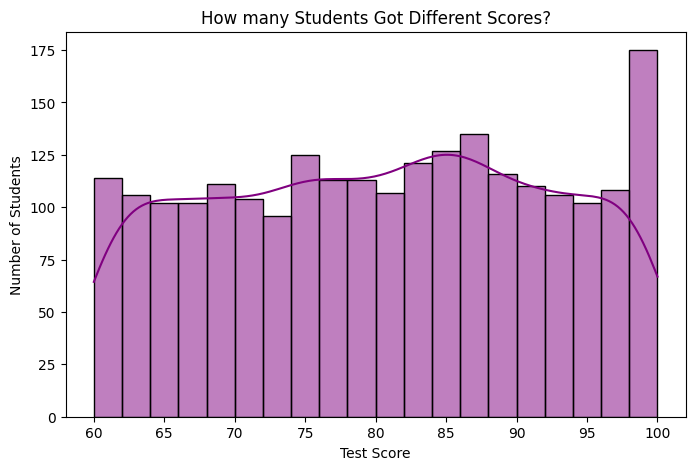

In [16]:
#Show Test Score Distrubution
plt.figure(figsize=(8, 5))
sns.histplot(Personalized['Test_Score'], bins=20, color='purple', kde=True)
plt.title("How many Students Got Different Scores?")
plt.xlabel("Test Score")
plt.ylabel("Number of Students")
plt.show()

C:\Users\rjnaw\AppData\Local\Temp\ipykernel_27108\2538264498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Course',data=Personalized, order=Personalized['Course'].value_counts().index, palette='viridis')


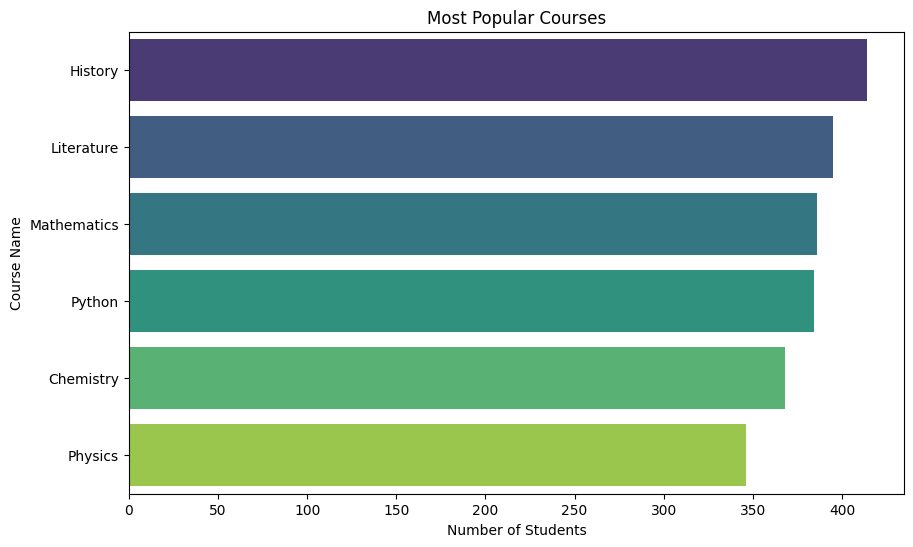

In [17]:
#Popular Courses Bar Chartt
plt.figure(figsize=(10, 6))
sns.countplot(y='Course',data=Personalized, order=Personalized['Course'].value_counts().index, palette='viridis')
plt.title("Most Popular Courses")
plt.xlabel("Number of Students")
plt.ylabel("Course Name")
plt.show()

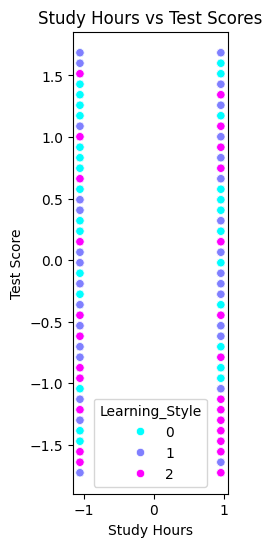

In [32]:
#Study hours vs Test Scores scatter Plot:-
plt.figure(figsize=(2, 6))
sns.scatterplot(x="Study_Hours", y="Test_Score",data=Personalized, hue='Learning_Style', palette='cool')
plt.title("Study Hours vs Test Scores")
plt.xlabel("Study Hours")
plt.ylabel("Test Score")
plt.show()

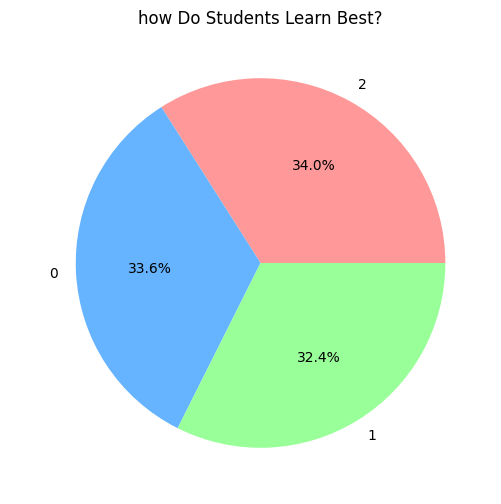

In [19]:
#Learning Styles Pie Chart:-
plt.figure(figsize=(6, 6))
Personalized['Learning_Style'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("how Do Students Learn Best?")
plt.ylabel(" ")
plt.show()

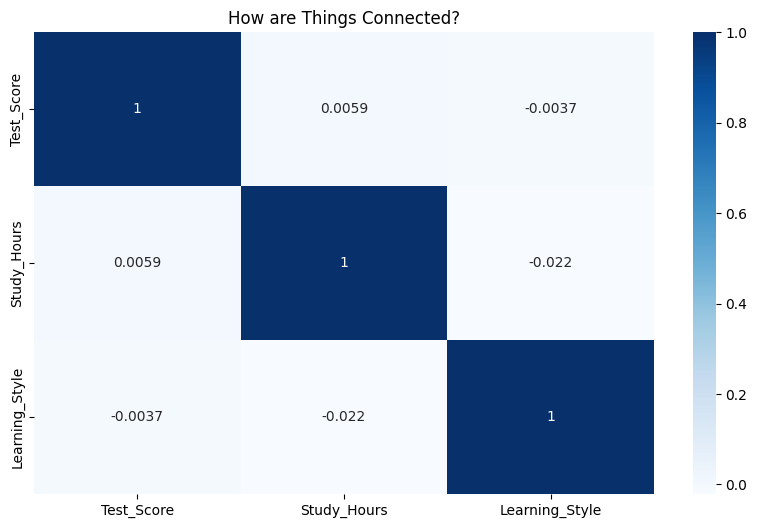

In [34]:
#Heatmap of correlation:-
plt.figure(figsize=(10, 6))
correlation_matrix = Personalized[['Test_Score', 'Study_Hours', 'Learning_Style',]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("How are Things Connected?")
plt.show()

In [21]:
#Feature Engineering:- 
Personalized['Study_Efficiency'] = Personalized['Test_Score']/Personalized['Study_Hours']
Personalized['Study_Efficiency']

0       12.800000
1       16.800000
2       14.666667
3       13.200000
4       16.400000
          ...    
2288    11.500000
2289    17.200000
2290    15.666667
2291    16.500000
2292    18.000000
Name: Study_Efficiency, Length: 2293, dtype: float64

In [22]:
Personalized

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description,Study_Efficiency
0,10,0,Lisa Brown,Music,Python,4.8,64,5,1,2,6,1,Low,9.8,0,5.2,High,0,Python: hands-on approach with focus on critic...,12.800000
1,11,1,John Wilson,Dance,Physics,4.6,84,5,0,2,1,8,High,8.9,2,6.4,Medium,3,Physics: collaborative approach with focus on ...,16.800000
2,16,1,Jennifer Lee,Study,History,4.0,88,6,2,0,7,5,Medium,9.9,2,6.4,Low,1,History: collaborative approach with focus on ...,14.666667
3,17,0,Neha Gupta,Study,Chemistry,3.6,66,5,0,2,1,5,Low,1.3,1,6.0,High,2,Chemistry: theoretical approach with focus on ...,13.200000
4,18,0,Emily White,Music,Physics,3.3,82,5,0,0,1,5,High,4.4,1,7.5,High,0,Physics: theoretical approach with focus on cr...,16.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,6985,0,David Miller,Gaming,History,4.2,69,6,0,2,4,4,Low,2.6,2,8.5,High,3,History: collaborative approach with focus on ...,11.500000
2289,6988,0,Neha Gupta,Sports,Chemistry,3.6,86,5,1,0,10,8,Low,4.4,0,2.0,Low,0,Chemistry: hands-on approach with focus on pro...,17.200000
2290,6989,0,Neha Gupta,Study,Python,4.9,94,6,0,0,2,4,High,1.1,2,1.2,Medium,2,Python: theoretical approach with focus on cri...,15.666667
2291,6990,1,Vikram Malhotra,Art,Physics,3.1,99,6,0,0,10,8,High,2.7,1,7.4,High,1,Physics: interactive approach with focus on cr...,16.500000


In [23]:
#Normalize Numerical Features:-
scaler = StandardScaler()
numerical_cols = ['Study_Hours', 'Motivation_Score', 'Parental_Involvement', 'Self_Efficacy', 'Skill_Assessment','Test_Score', 'Course_Rating']   
Personalized[numerical_cols] = scaler.fit_transform(Personalized[numerical_cols])

In [24]:
#Encoding Categorical Variables using one-hot encoding:-
Personalized = pd.get_dummies(Personalized, drop_first=True)
Personalized

,Student Id,Gender,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Self_Efficacy,...,Course_Description_Python: interactive approach with focus on critical thinking,Course_Description_Python: interactive approach with focus on problem-solving,Course_Description_Python: practical approach with focus on analytical skills,Course_Description_Python: practical approach with focus on creative expression,Course_Description_Python: practical approach with focus on critical thinking,Course_Description_Python: practical approach with focus on problem-solving,Course_Description_Python: theoretical approach with focus on analytical skills,Course_Description_Python: theoretical approach with focus on creative expression,Course_Description_Python: theoretical approach with focus on critical thinking,Course_Description_Python: theoretical approach with focus on problem-solving
0,10,0,1.420246,-1.385449,-1.050557,1,2,0.169424,-1.541165,1.640166,...,False,False,False,False,False,False,False,False,False,False
1,11,1,1.075319,0.319868,-1.050557,0,2,-1.598041,0.905160,1.293255,...,False,False,False,False,False,False,False,False,False,False
2,16,1,0.040540,0.660931,0.951876,2,0,0.522917,-0.143265,1.678712,...,False,False,False,False,False,False,False,False,False,False
3,17,0,-0.649313,-1.214917,-1.050557,0,2,-1.598041,-0.143265,-1.636216,...,False,False,False,False,False,False,False,False,False,False
4,18,0,-1.166703,0.149336,-1.050557,0,0,-1.598041,-0.143265,-0.441300,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,6985,0,0.385466,-0.959120,0.951876,0,2,-0.537562,-0.492740,-1.135122,...,False,False,False,False,False,False,False,False,False,False
2289,6988,0,-0.649313,0.490399,-1.050557,1,0,1.583396,0.905160,-0.441300,...,False,False,False,False,False,False,False,False,False,False
2290,6989,0,1.592709,1.172526,0.951876,0,0,-1.244548,-0.492740,-1.713307,...,False,False,False,False,False,False,False,False,True,False
2291,6990,1,-1.511629,1.598855,0.951876,0,0,1.583396,0.905160,-1.096576,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X = Personalized.drop(['Test_Score', 'Study_Hours'],axis=1)
y = Personalized['Test_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = rf_regressor.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MSE: 0.06158334933673948
RMSE: 0.24815992693571515
R² Score: 0.9414525698810082


In [39]:
y_train_class = y_train.astype(int)
y_test_class = y_test.astype(int)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_class)
predictions = rf_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_class, predictions)}")

Accuracy: 0.7668845315904139
